# Install and Import packages

In [96]:
!pip install hrv-analysis

In [97]:
!pip install wfdb

  Using cached matplotlib-3.4.3-cp37-cp37m-manylinux1_x86_64.whl (10.3 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [98]:
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil
import posixpath

import wfdb

results = {}

## Download content from Physionet

In [99]:
# List the PhysioNet Databases

dbs = wfdb.get_dbs()
display(dbs)

[['aami-ec13', 'ANSI/AAMI EC13 Test Waveforms'],
 ['accelerometry-walk-climb-drive',
  'Labeled raw accelerometry data captured during walking, stair climbing and driving'],
 ['adfecgdb', 'Abdominal and Direct Fetal ECG Database'],
 ['afdb', 'MIT-BIH Atrial Fibrillation Database'],
 ['afpdb', 'PAF Prediction Challenge Database'],
 ['aftdb', 'AF Termination Challenge Database'],
 ['ahadb', 'AHA Database Sample Excluded Record'],
 ['antimicrobial-resistance-uti',
  'AMR-UTI: Antimicrobial Resistance in Urinary Tract Infections'],
 ['apnea-ecg', 'Apnea-ECG Database'],
 ['autonomic-aging-cardiovascular',
  'Autonomic Aging: A dataset to quantify changes of cardiovascular autonomic function during healthy aging'],
 ['bhx-brain-bounding-box',
  'Brain Hemorrhage Extended (BHX): Bounding box extrapolation from thick to thin slice CT images'],
 ['bidmc', 'BIDMC PPG and Respiration Dataset'],
 ['bigideaslab-step-hr-smartwatch',
  'BigIdeasLab_STEP: Heart rate measurements captured by smartwatch

In [100]:
# Download all the WFDB records and annotations from a small PhysioNet Database

# Make a temporary download directory in your current working directory
cwd = os.getcwd()
dl_dir = os.path.join(cwd, 'tmp_dl_dir')

# Download all the WFDB content
wfdb.dl_database('apnea-ecg', dl_dir=dl_dir)

# Display the downloaded content in the folder
display(os.listdir(dl_dir))

# Cleanup: delete the downloaded directory
# shutil.rmtree(dl_dir)

Generating record list for: a01
Generating record list for: a01er
Generating record list for: a01r
Generating record list for: a02
Generating record list for: a02er
Generating record list for: a02r
Generating record list for: a03
Generating record list for: a03er
Generating record list for: a03r
Generating record list for: a04
Generating record list for: a04er
Generating record list for: a04r
Generating record list for: a05
Generating record list for: a06
Generating record list for: a07
Generating record list for: a08
Generating record list for: a09
Generating record list for: a10
Generating record list for: a11
Generating record list for: a12
Generating record list for: a13
Generating record list for: a14
Generating record list for: a15
Generating record list for: a16
Generating record list for: a17
Generating record list for: a18
Generating record list for: a19
Generating record list for: a20
Generating record list for: b01
Generating record list for: b01er
Generating record list for

['x14.hea',
 'a19.dat',
 'x09.hea',
 'x07.qrs',
 'x33.qrs',
 'a06.dat',
 'c04.qrs',
 'b01er.hea',
 'x26.qrs',
 'x35.qrs',
 'c02.apn',
 'x20.dat',
 'x02.hea',
 'c03r.hea',
 'a17.dat',
 'a02.dat',
 'x24.qrs',
 'a12.hea',
 'a15.qrs',
 'x17.hea',
 'x35.hea',
 'x33.dat',
 'b02.apn',
 'c10.dat',
 'x08.qrs',
 'a06.qrs',
 'x14.apn',
 'x32.apn',
 'c06.dat',
 'c02r.apn',
 'a02r.dat',
 'b05.qrs',
 'c01.hea',
 'x27.hea',
 'b01r.dat',
 'c02er.hea',
 'x27.dat',
 'a11.dat',
 'x18.hea',
 'x08.dat',
 'a03er.hea',
 'x09.apn',
 'b03.hea',
 'x34.qrs',
 'a11.apn',
 'c10.apn',
 'a03.hea',
 'c05.hea',
 'x31.dat',
 'a05.qrs',
 'x03.apn',
 'x11.apn',
 'x12.apn',
 'x22.qrs',
 'a11.qrs',
 'a20.qrs',
 'a09.dat',
 'a05.apn',
 'a16.hea',
 'x33.apn',
 'x04.dat',
 'c01r.hea',
 'a04er.qrs',
 'x07.hea',
 'c09.hea',
 'x18.qrs',
 'b01.hea',
 'x02.qrs',
 'c04.dat',
 'x13.qrs',
 'a13.dat',
 'a03r.apn',
 'x16.apn',
 'x29.dat',
 'a01r.dat',
 'x16.qrs',
 'c03.qrs',
 'x01.apn',
 'a18.qrs',
 'c02.dat',
 'x14.dat',
 'a14.hea',
 

In [101]:
pwd

'/content'

In [102]:
#!ls

In [103]:
#%cd tmp_dl_dir/

In [104]:
#!ls

In [105]:
#!zip -r /content/PhysioNetSleepapneaDataset.zip /content/tmp_dl_dir

In [106]:
# from google.colab import files
# files.download("/content/PhysioNetSleepapneaDataset.zip")

## Pre-processing and peak detection

In [107]:
!pip install matplotlib==3.1.3

  Using cached matplotlib-3.1.3-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.4.3
    Uninstalling matplotlib-3.4.3:
      Successfully uninstalled matplotlib-3.4.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
wfdb 3.4.1 requires matplotlib>=3.3.4, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


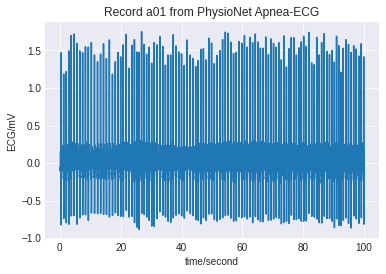

{'adc_gain': [200.0],
 'adc_res': [12],
 'adc_zero': [0],
 'base_counter': None,
 'base_date': None,
 'base_time': None,
 'baseline': [0],
 'block_size': [0],
 'byte_offset': [None],
 'checksum': [64591],
 'comments': [],
 'counter_freq': None,
 'd_signal': None,
 'e_d_signal': None,
 'e_p_signal': None,
 'file_name': ['a01.dat'],
 'fmt': ['16'],
 'fs': 100,
 'init_value': [-12],
 'n_sig': 1,
 'p_signal': array([[-0.06 ],
        [-0.065],
        [-0.06 ],
        ...,
        [-0.095],
        [-0.07 ],
        [-0.035]]),
 'record_name': 'a01',
 'samps_per_frame': [1],
 'sig_len': 10000,
 'sig_name': ['ECG'],
 'skew': [None],
 'units': ['mV']}

In [108]:
import wfdb
from wfdb import processing
import matplotlib.pyplot as plt
import matplotlib
# Load the WFDB record 10 sec segment and the physical samples
record = wfdb.rdrecord('tmp_dl_dir/a01', sampfrom=0, sampto=10000)

wfdb.plot_wfdb(record=record, time_units='seconds', title='Record a01 from PhysioNet Apnea-ECG') 
display(record.__dict__)


In [109]:
#Use the GQRS detection algorithm and correct the peaks

def peaks_hr(sig, peak_inds, fs, title, figsize=(20, 10), saveto=None):
    "Plot a signal with its peaks and heart rate"
    # Calculate heart rate
    hrs = processing.hr.compute_hr(sig_len=sig.shape[0], qrs_inds=peak_inds, fs=fs)
    
    N = sig.shape[0]
    
    fig, ax_left = plt.subplots(figsize=figsize)
    ax_right = ax_left.twinx()
    
    ax_left.plot(sig, color='#3979f0', label='Signal')
    ax_left.plot(peak_inds, sig[peak_inds], 'rx', marker='x', 
                 color='#8b0000', label='Peak', markersize=12)
    ax_right.plot(np.arange(N), hrs, label='Heart rate', color='m', linewidth=2)

    ax_left.set_title(title)

    ax_left.set_xlabel('Time (ms)')
    ax_left.set_ylabel('ECG (mV)', color='#3979f0')
    ax_right.set_ylabel('Heart rate (bpm)', color='m')
    # Make the y-axis label, ticks and tick labels match the line color.
    ax_left.tick_params('y', colors='#3979f0')
    ax_right.tick_params('y', colors='m')
    if saveto is not None:
        plt.savefig(saveto, dpi=600)
    plt.show()




In [110]:
!pip install biosppy

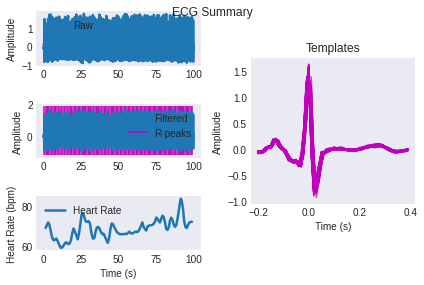

In [111]:
#get r peaks on this segment
import biosppy
ind= biosppy.signals.ecg.ecg(record.p_signal[:,0], sampling_rate=100, show=True)

In [112]:
# Now load the entire duration of the signal and get r peaks

record = wfdb.rdrecord('tmp_dl_dir/a01', sampfrom=0,sampto=100000)
ind= biosppy.signals.ecg.ecg(record.p_signal[:,0], sampling_rate=100, show=False)

In [113]:
print(ind.keys())

['ts', 'filtered', 'rpeaks', 'templates_ts', 'templates', 'heart_rate_ts', 'heart_rate']


In [114]:
import numpy as np
print(np.average(ind['heart_rate']))

72.96930558410631


In [115]:
rr_ind = np.diff(ind['rpeaks'])

In [116]:
rr_ms = [element * 10 for element in rr_ind]

In [117]:
print(rr_ms)

[880, 840, 830, 830, 880, 940, 970, 940, 930, 940, 1000, 1020, 1010, 990, 970, 950, 980, 1010, 940, 900, 860, 850, 970, 930, 930, 840, 770, 770, 810, 810, 840, 840, 810, 830, 890, 1000, 930, 880, 860, 850, 870, 890, 910, 920, 880, 970, 1000, 940, 860, 820, 840, 870, 880, 880, 920, 900, 900, 920, 900, 900, 910, 910, 880, 880, 930, 900, 870, 910, 890, 880, 890, 840, 830, 830, 920, 880, 850, 840, 870, 840, 840, 860, 820, 800, 800, 840, 840, 820, 780, 790, 840, 860, 920, 860, 810, 800, 810, 850, 880, 850, 820, 770, 740, 710, 700, 780, 830, 890, 870, 840, 830, 830, 830, 800, 790, 780, 870, 850, 880, 800, 790, 870, 920, 880, 850, 830, 850, 920, 940, 890, 850, 820, 830, 850, 850, 810, 810, 900, 920, 870, 830, 880, 920, 930, 920, 890, 920, 940, 910, 870, 880, 910, 910, 860, 790, 740, 730, 810, 990, 910, 850, 780, 750, 750, 870, 880, 860, 840, 810, 770, 740, 730, 760, 800, 800, 780, 790, 770, 750, 730, 710, 690, 670, 670, 690, 710, 720, 700, 700, 740, 840, 890, 880, 900, 910, 900, 890, 890, 910

![][logo]

[logo]: img/ecg_normalized.png 

In [118]:
# remove ectopic beats and interpolate
from hrvanalysis import remove_ectopic_beats, interpolate_nan_values, get_time_domain_features, get_frequency_domain_features, get_geometrical_features
from hrvanalysis import get_csi_cvi_features, get_poincare_plot_features
ect_ind = remove_ectopic_beats(rr_ms)
nn_interval = interpolate_nan_values(rr_intervals=ect_ind)


10 ectopic beat(s) have been deleted with malik rule.


In [119]:
time_domain_features = get_time_domain_features(nn_interval)

## Time Domain Measures

In [120]:
time_dict = get_time_domain_features(nn_interval)
results['avnn'] = time_dict['mean_nni']
results['hr'] = time_dict['mean_hr']
results['SDNN'] = time_dict['sdnn']
results['pNN50'] = time_dict['pnni_20']
results['RMSSD'] = time_dict['rmssd']
results['HRdiff'] = time_dict['max_hr'] - time_dict['min_hr']

In [121]:
print(results)

{'avnn': 831.5137614678899, 'hr': 73.04062883477803, 'SDNN': 90.6995053435377, 'pNN50': 47.24540901502504, 'RMSSD': 43.32246985099053, 'HRdiff': 45.45454545454545}


## Frequency Domain Measures
Apply a Fast Fourier Transform (FFT) to the time-series data to obtain frequency domain measures.

In [122]:
from hrvanalysis.extract_features import get_frequency_domain_features
freq_dict = get_frequency_domain_features(nn_interval)

results['VLF'] = freq_dict['vlf']
results['LF'] = freq_dict['lf']
results['HF'] = freq_dict['hf']
results['LHFratio'] = freq_dict['lf_hf_ratio']

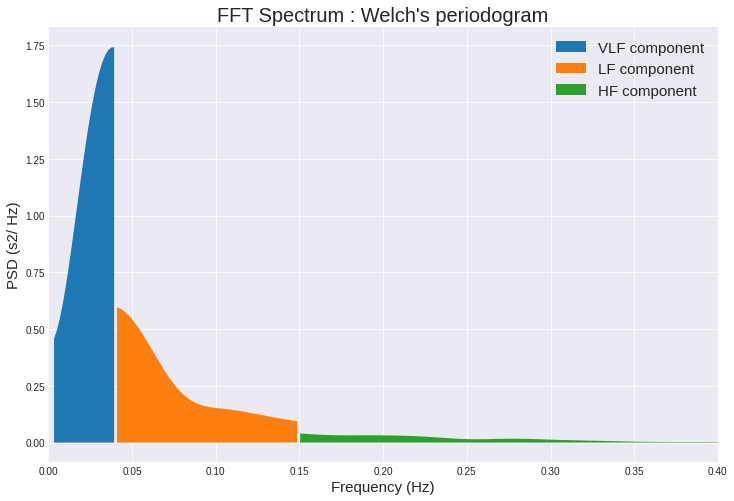

In [123]:
from hrvanalysis import plot_psd

plot_psd(nn_interval, method="welch")

In [124]:
print(results)

{'avnn': 831.5137614678899, 'hr': 73.04062883477803, 'SDNN': 90.6995053435377, 'pNN50': 47.24540901502504, 'RMSSD': 43.32246985099053, 'HRdiff': 45.45454545454545, 'VLF': 1253.0659317695215, 'LF': 1672.2046668444693, 'HF': 663.069710839543, 'LHFratio': 2.5219138191777972}


In [125]:
print(len(nn_interval))

1199


## Poincare Plot features

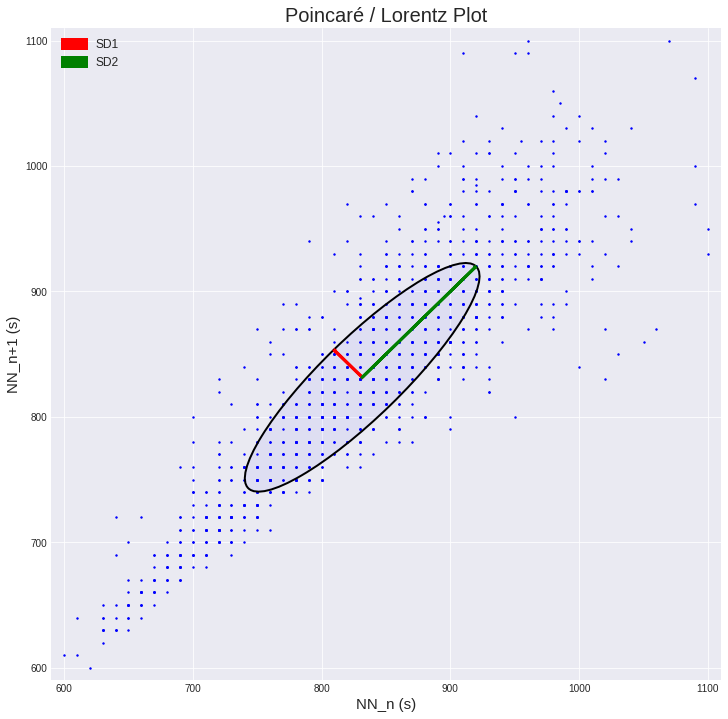

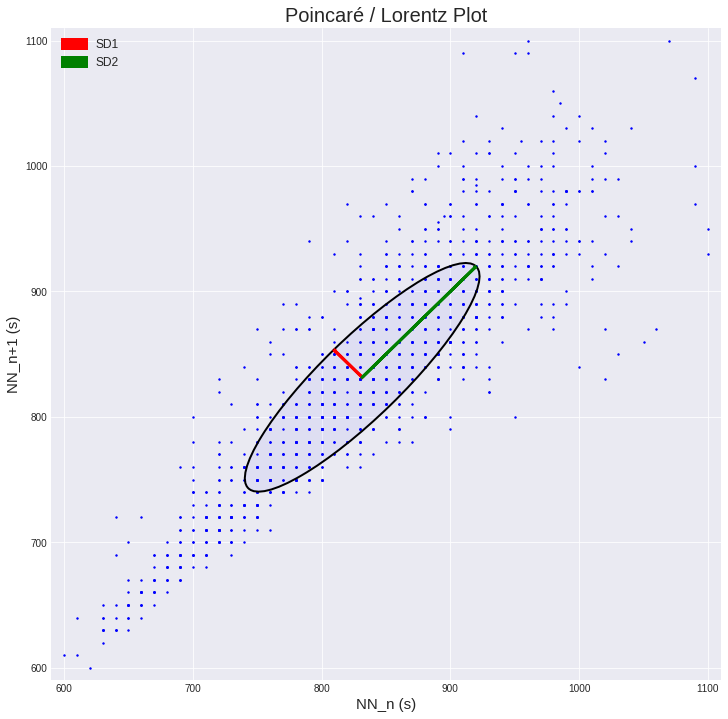

In [126]:
from hrvanalysis import plot_poincare

plot_poincare(nn_interval)
plot_poincare(nn_interval, plot_sd_features=True)

In [127]:
results['record']='a01'

In [128]:
results.keys()

dict_keys(['avnn', 'hr', 'SDNN', 'pNN50', 'RMSSD', 'HRdiff', 'VLF', 'LF', 'HF', 'LHFratio', 'record'])

In [129]:
import csv
csv_columns = results.keys()

csv_file = "features.csv"
try:
    with open(csv_file, 'w') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=csv_columns)
        writer.writeheader()
        writer.writerow([key,value])      
except IOError:
    print("I/O error")

AttributeError: ignored

In [ ]:
# s_file = open('sample.csv','w')
# writer = csv.DictWriter(csvfile, fieldnames=csv_columns)
# for key, value in results.items():
#   s_file=writer.writerow([[key,value]])
# s_file.close()